# Introduction
This kernel has been created by the [Information Systems Lab](http://islab.uom.gr) to introduce students of the [University of Macedonia](http://www.uom.gr/index.php?tmima=2&categorymenu=2), Greece to Machine Learning & Data Science.

## The Instacart competition
Instacart is an American company that operates as a same-day grocery delivery service. Customers select groceries through a web application from various retailers and delivered by a personal shopper. Instacart's service is mainly provided through a smartphone app, available on iOS and Android platforms, apart from its website.

In 2017 Instacart organised a Kaggle competition and provided to the community a sample dataset of over 3 million grocery orders from more than 200,000 Instacart users. The orders include 32 million basket items and 50,000 unique products. The objective of the competition was participants to **predict which previously purchased products will be in a user’s next order**.

## Objective
The objective of this Kernel is to introduce students to predictive business analytics with Python through the Instacart case. 

By the time you finish this example, you will be able to:
* Describe the steps of creating a predictive analytics model
* Use Python and Pandas package to manipulate data
* Use Python and Pandas package to create, combine, and delete DataFrames
* Use Logistic Regression to create a predictive model
* Apply the predictive model in order to make a prediction
* Create a submission file for the competition of Instacart

## Problem definition
The data that Instacart opened up include orders of 200,000 Instacart users with each user having between 4 and 100 orders. Instacart indicates each order in the data as prior, train or test. Prior orders describe the **past behaviour** of a user while train and test orders regard the **future behaviour that we need to predict**. 

As a result, we want to predict which previously purchased products (prior orders) will be in a user’s next order (train and test orders). 

For the train orders Instacart reveals the results (i.e., the ordered products) while for the test orders we do not have this piece of information. Moreover, the future order of each user can be either train or test meaning that each user will be either a train or a test user. 

The setting of the Instacart problem is described in the figure below (orders with yellow color denotes future orders of a user). 

<img src="https://i.imgur.com/S0Miw3m.png" width="350">

Each user has purchased various products during their prior orders. Moreover, for each user we know the order_id of their future order. The goal is to predict which of these products will be in a user's future order. 

This is a **classification problem** because we need to predict whether each pair of user and product is a reorder or not. This is indicated by the value of the reordered variable, i.e. reordered=1 or reordered=0 (see figure below). 

<img src="https://i.imgur.com/SxK2gsR.png" width="350">

As a result we need to come up and calculate various **predictor variables (X)** that will describe the characteristics of a product and the behaviour of a user regarding one or multiple products. We will do so by analysing the prior orders of the dataset. We will then use the train users to create a predictive model and the test users to make our actual prediction. As a result we create a table as the following one and we train an algorithm based on predictor variables (X) and response variable (Y).

<img src="https://i.imgur.com/Yb1CKAF.png" width="600">

## Method
Our method includes the following steps:
1. <b>Import and reshape data</b>: This step includes loading CSV files into pandas DataFrames, tranform character variables to categorical variables, and create a supportive table.
2. <b>Create predictor variables</b>: This step includes identifying and calculating predictor variables (aka features) from the initial datasets provided by Instacart. 
3. <b>Create train and test DataFrames</b>: In this step we create two distinct pandas DataFrames that will be used in the creation and the use of the predictive model.
4. <b>Create predictive model (fit)</b>: In this step we employ Logistic Regression to create the predictive model through the train dataset.
5. <b>Apply predictive model (predict)</b>: This step includes applying the model to predict the 'reordered' variable for the test dataset.
6. <b>Create submission file</b>: In this final step we create the submission file with our predictions for Instacart's competition.
7. <b>Get F1 score</b>: In this step we submit the produced and file and get the F1 score describing the accuracy of our prediction model.

# 1. Import and Reshape Data 
First we load the necessary Python packages and then we import the CSV files that were provided by Instacart.

## 1.1 Import the required packages
The garbage collector (package gc), attempts to reclaim garbage, or memory occupied by objects (e.g., DataFrames) that are no longer in use by Python ([ref1](https://www.techopedia.com/definition/1083/garbage-collection-gc-general-programming), [ref2](https://en.wikipedia.org/wiki/Garbage_collection_(computer_science)). This package will eliminate our risk to exceed the 16GB threshold of available RAM that Kaggle offers.

The **"as"** reserved word is to define an alias to the package. The alias help us to call easier a package in our code.

In [1]:
# For data manipulation
import pandas as pd              

# Garbage Collector to free up memory
import gc                         
gc.enable()                       # Activate 

## 1.2 Load data from the CSV files
Instacart provides 6 CSV files, which we have to load into Python. Towards this end, we use the .read_csv() function, which is included in the Pandas package. Reading in data with the .read_csv( ) function returns a DataFrame.

In [2]:
orders = pd.read_csv('../input/instacart-market-basket-analysis/orders.csv')
order_products_train = pd.read_csv('../input/instacart-market-basket-analysis/order_products__train.csv')
order_products_prior = pd.read_csv('../input/instacart-market-basket-analysis/order_products__prior.csv')
products = pd.read_csv('../input/instacart-market-basket-analysis/products.csv')
aisles = pd.read_csv('../input/instacart-market-basket-analysis/aisles.csv')
departments = pd.read_csv('../input/instacart-market-basket-analysis/departments.csv')

This step results in the following DataFrames:
* <b>orders</b>: This table includes all orders, namely prior, train, and test. It has single primary key (<b>order_id</b>).
* <b>order_products_train</b>: This table includes training orders. It has a composite primary key (<b>order_id and product_id</b>) and indicates whether a product in an order is a reorder or not (through the reordered variable).
* <b>order_products_prior </b>: This table includes prior orders. It has a composite primary key (<b>order_id and product_id</b>) and indicates whether a product in an order is a reorder or not (through the reordered variable).
* <b>products</b>: This table includes all products. It has a single primary key (<b>product_id</b>)
* <b>aisles</b>: This table includes all aisles. It has a single primary key (<b>aisle_id</b>)
* <b>departments</b>: This table includes all departments. It has a single primary key (<b>department_id</b>)

If you want to reduce the execution time of this Kernel you can use the following piece of code by uncomment it. This will trim the orders DataFrame and will keep a 10% random sample of the users. You can use this for experimentation.

In [3]:
'''
#### Remove triple quotes to trim your dataset and experiment with your data
### COMMANDS FOR CODING TESTING - Get 10% of users 
orders = orders.loc[orders.user_id.isin(orders.user_id.drop_duplicates().sample(frac=0.1, random_state=25))] 
'''

'\n#### Remove triple quotes to trim your dataset and experiment with your data\n### COMMANDS FOR CODING TESTING - Get 10% of users \norders = orders.loc[orders.user_id.isin(orders.user_id.drop_duplicates().sample(frac=0.1, random_state=25))] \n'

We now use the .head( ) method in order to visualise the first 10 rows of these tables. Click the Output button below to see the tables.

## 1.3 Reshape data
We transform the data in order to facilitate their further analysis. First, we convert character variables into categories so we can use them in the creation of the model. In Python, a categorical variable is called category and has a fixed number of different values.

In [4]:
# We convert character variables into category. 
# In Python, a categorical variable is called category and has a fixed number of different values
aisles['aisle'] = aisles['aisle'].astype('category')
departments['department'] = departments['department'].astype('category')
orders['eval_set'] = orders['eval_set'].astype('category')
products['product_name'] = products['product_name'].astype('category')

## 1.4 Create a DataFrame with the orders and the products that have been purchased on prior orders (op)
We create a new DataFrame, named <b>op</b> which combines (merges) the DataFrames <b>orders</b> and <b>order_products_prior</b>. Bear in mind that <b>order_products_prior</b> DataFrame includes only prior orders, so the new DataFrame <b>op</b>  will contain only these observations as well. Towards this end, we use pandas' merge function with how='inner' argument, which returns records that have matching values in both DataFrames. <img src="https://i.imgur.com/zEK7FpY.jpg" width="400">

In [5]:
#Merge the orders DF with order_products_prior by their order_id, keep only these rows with order_id that they are appear on both DFs
op = orders.merge(order_products_prior, on='order_id', how='inner')
op.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


The table contains for all the customers **(user_id)**: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ➡︎ the orders **(order_id)** that they have placed accompanied with: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ➡︎ the products **(product_id)** that have been bought in each order

# 2. Create Predictor Variables
We are now ready to identify and calculate predictor variables based on the provided data. We can create various types of predictors such as:
* <b>User predictors</b> describing the behavior of a user e.g. total number of orders of a user.
* <b>Product predictors</b> describing characteristics of a product e.g. total number of times a product has been purchased.
* <b>User & product predictors</b> describing the behavior of a user towards a specific product e.g. total times a user ordered a specific product.

## 2.1 Create user predictors


### 2.1.1 Number of orders per customer 📚📝
We calculate the total number of placed orders per customer. We create a **user** DataFrame to store the results.

In [6]:
## First approach in one step:
# Create distinct groups for each user, identify the highest order number in each group, save the new column to a DataFrame
user = op.groupby('user_id')['order_number'].max().to_frame('user_t_orders') #
user.head()

## Second approach in two steps: 
#1. Save the result as DataFrame with Double brackets --> [[ ]] 
#user = op.groupby('user_id')[['order_number']].max()
#2. Rename the label of the column
#user.columns = ['user_t_orders']
#user.head()

,user_t_orders
user_id,
1,10
2,14
3,12
4,5
5,4


In [7]:
product_avg_position = op.groupby('product_id')[['add_to_cart_order']].mean()
product_avg_position.columns = ['add_to_cart_mean']
product_avg_position = product_avg_position.reset_index()
product_avg_position.head()

,product_id,add_to_cart_mean
0,1,5.801836
1,2,9.888889
2,3,6.415162
3,4,9.507599
4,5,6.466667


In [8]:
reorprob = op.groupby('product_id').filter(lambda x: x.shape[0] >40)
p_reorprob_results = reorprob.groupby('product_id')['reordered'].mean().to_frame('p_reorder_ratio')
p_reorprob_results = p_reorprob_results.reset_index()
p_reorprob_results.head()

,product_id,p_reorder_ratio
0,1,0.613391
1,2,0.133333
2,3,0.732852
3,4,0.446809
4,8,0.503030


In [9]:
up_reorprob_results = reorprob.groupby(['user_id', 'product_id'])['reordered'].mean().to_frame('up_reorder_ratio')
up_reorprob_results = up_reorprob_results.reset_index()
up_reorprob_results.head()

,user_id,product_id,up_reorder_ratio
0,1,196,0.900000
1,1,10258,0.888889
2,1,10326,0.000000
3,1,12427,0.900000
4,1,13032,0.666667


In [10]:
reorprob_results = up_reorprob_results.merge(p_reorprob_results, on='product_id', how='left')
reorprob_results.head()

,user_id,product_id,up_reorder_ratio,p_reorder_ratio
0,1,196,0.900000,0.776480
1,1,10258,0.888889,0.713772
2,1,10326,0.000000,0.652009
3,1,12427,0.900000,0.740735
4,1,13032,0.666667,0.657158


In [11]:
#u_reorder_results = op.groupby('user_id')['reordered'].mean().to_frame('u_reordered_ratio')
#u_reorder_results = u_reorder_results.reset_index()
#u_reorder_results.head()

In [12]:
#reorprob_results = reorprob_results.merge(u_reorder_results, on='user_id', how='left')
#reorprob_results.head()

In [13]:
del [reorprob, p_reorprob_results, up_reorprob_results, ]
gc.collect()

86

In [14]:
# Reset the index of the DF so to bring user_id from index to column (pre-requisite for step 2.4)
user = user.reset_index()
user.head()

,user_id,user_t_orders
0,1,10
1,2,14
2,3,12
3,4,5
4,5,4


## 2.2 Create product predictors
 
### 2.2.1 Number of purchases for each product 📚📝
We calculate the total number of purchases for each product (from all customers). We create a **prd** DataFrame to store the results.

In [15]:
# Create distinct groups for each product, count the orders, save the result for each product to a new DataFrame  
prd = op.groupby('product_id')['order_id'].count().to_frame('prd_t_purchases') #
prd.head()

,prd_t_purchases
product_id,
1,1852
2,90
3,277
4,329
5,15


In [16]:
# Reset the index of the DF so to bring product_id rom index to column (pre-requisite for step 2.4)
prd = prd.reset_index()
prd.head()

,product_id,prd_t_purchases
0,1,1852
1,2,90
2,3,277
3,4,329
4,5,15


## 2.3 Create user-product predictors


### 2.3.1 How many times a user bought a product 📚📝
We create different groups that contain all the rows for each combination of user and product. Then with the aggregation function .count( ) we get how many times each user bought a product. We save the results on new **uxp** DataFrame.

In [17]:
# Create distinct groups for each combination of user and product, count orders, save the result for each user X product to a new DataFrame 
uxp = op.groupby(['user_id', 'product_id'])['order_id'].count().to_frame('uxp_t_bought') #
uxp.head()

uxp_t_bought
user_id product_id              
1       196                   10
        10258                  9
        10326                  1
        12427                 10
        13032                  3

In [18]:
# Reset the index of the DF so to bring user_id & product_id rom indices to columns (pre-requisite for step 2.4)
uxp = uxp.reset_index()
uxp.head()

,user_id,product_id,uxp_t_bought
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3


In [19]:
first_order_no = op.groupby(['user_id', 'product_id'])['order_number'].min().to_frame('first_order_number')
first_order_no  = first_order_no.reset_index()
first_order_no.head()

,user_id,product_id,first_order_number
0,1,196,1
1,1,10258,2
2,1,10326,5
3,1,12427,1
4,1,13032,2


In [20]:
span = user.merge(first_order_no, on='user_id', how='right')
span['Order_Range_D'] = span.user_t_orders - span.first_order_number + 1
span.head()


,user_id,user_t_orders,product_id,first_order_number,Order_Range_D
0,1,10,196,1,10
1,1,10,10258,2,9
2,1,10,10326,5,6
3,1,10,12427,1,10
4,1,10,13032,2,9


In [21]:
uxp_ratio = uxp.merge(span, on=['user_id', 'product_id'], how='left')
uxp_ratio['uxp_reorder_ratio'] = uxp_ratio.uxp_t_bought / uxp_ratio.Order_Range_D
uxp_ratio = uxp_ratio.drop(['uxp_t_bought', 'user_t_orders', 'first_order_number', 'Order_Range_D'], axis=1)
uxp_ratio.head()


,user_id,product_id,uxp_reorder_ratio
0,1,196,1.000000
1,1,10258,1.000000
2,1,10326,0.166667
3,1,12427,1.000000
4,1,13032,0.333333


In [22]:
del [first_order_no, span]
gc.collect()

116

## 2.4 Merge all features
We now merge the DataFrames with the three types of predictors that we have created (i.e., for the users, the products and the combinations of users and products).

We will start from the **uxp** DataFrame and we will add the user and prd DataFrames. We do so because we want our final DataFrame (which will be called **data**) to have the following structure: 

<img style="float: left;" src="https://i.imgur.com/mI5BbFE.jpg" >






### 2.4.1 Merge uxp with user DataFrame
Here we select to perform a left join of uxp with user DataFrame based on matching key "user_id"

<img src="https://i.imgur.com/WlI84Ud.jpg" width="400">

Left join, ensures that the new DataFrame will have:
- all the observations of the uxp (combination of user and products) DataFrame 
- all the **matching** observations of user DataFrame with uxp based on matching key **"user_id"**

The new DataFrame as we have already mentioned, will be called **data**.

In [23]:
uxp = uxp.merge(uxp_ratio, on=['user_id', 'product_id'])
uxp.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio
0,1,196,10,1.000000
1,1,10258,9,1.000000
2,1,10326,1,0.166667
3,1,12427,10,1.000000
4,1,13032,3,0.333333


In [24]:
del uxp_ratio
gc.collect()

25

In [25]:
op['order_number_back'] = op.groupby('user_id')['order_number'].transform(max) - op.order_number +1 
op.head(15)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,order_number_back
0,2539329,1,prior,1,2,8,NaN,196,1,0,10
1,2539329,1,prior,1,2,8,NaN,14084,2,0,10
2,2539329,1,prior,1,2,8,NaN,12427,3,0,10
3,2539329,1,prior,1,2,8,NaN,26088,4,0,10
4,2539329,1,prior,1,2,8,NaN,26405,5,0,10
5,2398795,1,prior,2,3,7,15.0,196,1,1,9
6,2398795,1,prior,2,3,7,15.0,10258,2,0,9
7,2398795,1,prior,2,3,7,15.0,12427,3,1,9
8,2398795,1,prior,2,3,7,15.0,13176,4,0,9
9,2398795,1,prior,2,3,7,15.0,26088,5,1,9


In [26]:
op5 = op[op.order_number_back <= 5]
op5.head(15)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,order_number_back
29,3367565,1,prior,6,2,7,19.0,196,1,1,5
30,3367565,1,prior,6,2,7,19.0,12427,2,1,5
31,3367565,1,prior,6,2,7,19.0,10258,3,1,5
32,3367565,1,prior,6,2,7,19.0,25133,4,1,5
33,550135,1,prior,7,1,9,20.0,196,1,1,4
34,550135,1,prior,7,1,9,20.0,10258,2,1,4
35,550135,1,prior,7,1,9,20.0,12427,3,1,4
36,550135,1,prior,7,1,9,20.0,25133,4,1,4
37,550135,1,prior,7,1,9,20.0,13032,5,1,4
38,3108588,1,prior,8,1,14,14.0,12427,1,1,3


In [27]:
reorprob5 = op5.groupby('product_id').filter(lambda x: x.shape[0] >40)
up_reorprob_results5 = reorprob5.groupby(['user_id', 'product_id'])['reordered'].mean().to_frame('up_reorder_ratio5')
up_reorprob_results5 = up_reorprob_results5.reset_index()
up_reorprob_results5.head()

,user_id,product_id,up_reorder_ratio5
0,1,196,1.0
1,1,10258,1.0
2,1,12427,1.0
3,1,13032,1.0
4,1,25133,1.0


In [28]:
del op
gc.collect()

25

In [29]:
last_five = op5.groupby(['user_id','product_id'])[['order_id']].count()
last_five.columns = ['times_last5']
last_five.head(10)

times_last5
user_id product_id             
1       196                   5
        10258                 5
        12427                 5
        13032                 2
        25133                 5
        35951                 1
        38928                 1
        39657                 1
        46149                 3
        49235                 2

In [30]:
uxp = uxp.merge(last_five, on=['user_id', 'product_id'], how='left')
uxp.head(15)

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5
0,1,196,10,1.000000,5.0
1,1,10258,9,1.000000,5.0
2,1,10326,1,0.166667,NaN
3,1,12427,10,1.000000,5.0
4,1,13032,3,0.333333,2.0
5,1,13176,2,0.222222,NaN
6,1,14084,1,0.100000,NaN
7,1,17122,1,0.166667,NaN
8,1,25133,8,1.000000,5.0
9,1,26088,2,0.200000,NaN


In [31]:
uxp = uxp.merge(up_reorprob_results5, on=['user_id', 'product_id'], how='left')
uxp.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,up_reorder_ratio5
0,1,196,10,1.000000,5.0,1.0
1,1,10258,9,1.000000,5.0,1.0
2,1,10326,1,0.166667,NaN,NaN
3,1,12427,10,1.000000,5.0,1.0
4,1,13032,3,0.333333,2.0,1.0


In [32]:
del [op5, last_five, up_reorprob_results5, reorprob5]
gc.collect()

90

### 2.4.1 Merge data with prd DataFrame 📚📝
In this step we continue with our new DataFrame **data** and we perform a left join with prd DataFrame. The matching key here is the "product_id".
<img src="https://i.imgur.com/Iak6nIz.jpg" width="400">

Left join, ensures that the new DataFrame will have:
- all the observations of the data (features of userXproducts and users) DataFrame 
- all the **matching** observations of prd DataFrame with data based on matching key **"product_id"**

In [33]:
#Merge uxp features with the user features
#Store the results on a new DataFrame
data = uxp.merge(user, on='user_id', how='left')
data.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,up_reorder_ratio5,user_t_orders
0,1,196,10,1.000000,5.0,1.0,10
1,1,10258,9,1.000000,5.0,1.0,10
2,1,10326,1,0.166667,NaN,NaN,10
3,1,12427,10,1.000000,5.0,1.0,10
4,1,13032,3,0.333333,2.0,1.0,10


In [34]:
#Merge uxp & user features (the new DataFrame) with prd features
data = data.merge(prd, on='product_id', how='left') #
data.head()


,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,up_reorder_ratio5,user_t_orders,prd_t_purchases
0,1,196,10,1.000000,5.0,1.0,10,35791
1,1,10258,9,1.000000,5.0,1.0,10,1946
2,1,10326,1,0.166667,NaN,NaN,10,5526
3,1,12427,10,1.000000,5.0,1.0,10,6476
4,1,13032,3,0.333333,2.0,1.0,10,3751


In [35]:
data = data.merge(product_avg_position, on='product_id', how='left')
data.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,up_reorder_ratio5,user_t_orders,prd_t_purchases,add_to_cart_mean
0,1,196,10,1.000000,5.0,1.0,10,35791,3.721774
1,1,10258,9,1.000000,5.0,1.0,10,1946,4.277492
2,1,10326,1,0.166667,NaN,NaN,10,5526,4.191097
3,1,12427,10,1.000000,5.0,1.0,10,6476,4.760037
4,1,13032,3,0.333333,2.0,1.0,10,3751,5.622767


In [36]:
del [uxp, user, prd, product_avg_position]
gc.collect()

7

In [37]:
data = data.merge(reorprob_results, on=['user_id', 'product_id'], how='left')
data.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,up_reorder_ratio5,user_t_orders,prd_t_purchases,add_to_cart_mean,up_reorder_ratio,p_reorder_ratio
0,1,196,10,1.000000,5.0,1.0,10,35791,3.721774,0.900000,0.776480
1,1,10258,9,1.000000,5.0,1.0,10,1946,4.277492,0.888889,0.713772
2,1,10326,1,0.166667,NaN,NaN,10,5526,4.191097,0.000000,0.652009
3,1,12427,10,1.000000,5.0,1.0,10,6476,4.760037,0.900000,0.740735
4,1,13032,3,0.333333,2.0,1.0,10,3751,5.622767,0.666667,0.657158


### 2.4.2 Delete previous DataFrames

The information from the DataFrames that we have created to store our features (op, user, prd, uxp) is now stored on **data**. 

As we won't use them anymore, we now delete them.

In [38]:
del reorprob_results
gc.collect()

75

# 3. Create train and test DataFrames
## 3.1 Include information about the last order of each user

The **data** DataFrame that we have created on the previous chapter (2.4) should include two more columns which define the type of user (train or test) and the order_id of the future order.
This information can be found on the initial orders DataFrame which was provided by Instacart: 

<img style="float: left;" src="https://i.imgur.com/jbatzRY.jpg" >


Towards this end:
1. We select the **orders** DataFrame to keep only the future orders (labeled as "train" & "test). 
2. Keep only the columns of our desire ['eval_set', 'order_id'] <span style="color:red">**AND** </span> 'user_id' as is the matching key with our **data** DataFrame
2. Merge **data** DataFrame with the information for the future order of each customer using as matching key the 'user_id'

To filter and select the columns of our desire on orders (the 2 first steps) there are numerous approaches:

In [39]:
## First approach:
# In two steps keep only the future orders from all customers: train & test 
orders_future = orders[((orders.eval_set=='train') | (orders.eval_set=='test'))]
orders_future = orders_future[ ['user_id', 'eval_set', 'order_id'] ]
orders_future.head(10)

## Second approach (if you want to test it you have to re-run the notebook):
# In one step keep only the future orders from all customers: train & test 
#orders_future = orders.loc[((orders.eval_set=='train') | (orders.eval_set=='test')), ['user_id', 'eval_set', 'order_id'] ]
#orders_future.head(10)

## Third approach (if you want to test it you have to re-run the notebook):
# In one step exclude all the prior orders so to deal with the future orders from all customers
#orders_future = orders.loc[orders.eval_set!='prior', ['user_id', 'eval_set', 'order_id'] ]
#orders_future.head(10)

,user_id,eval_set,order_id
10,1,train,1187899
25,2,train,1492625
38,3,test,2774568
44,4,test,329954
49,5,train,2196797
53,6,test,1528013
74,7,train,525192
78,8,train,880375
82,9,train,1094988
88,10,train,1822501


Now to fulfill step 3, we merge on **data** DataFrame the information for the last order of each customer. The matching key here is the user_id and we select a left join as we want to keep all the observations from **data** DataFrame.

<img src="https://i.imgur.com/m3pNVDW.jpg" width="400">

In [40]:
# bring the info of the future orders to data DF
data = data.merge(orders_future, on='user_id', how='left')
data.head(10)

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,up_reorder_ratio5,user_t_orders,prd_t_purchases,add_to_cart_mean,up_reorder_ratio,p_reorder_ratio,eval_set,order_id
0,1,196,10,1.000000,5.0,1.0,10,35791,3.721774,0.900000,0.776480,train,1187899
1,1,10258,9,1.000000,5.0,1.0,10,1946,4.277492,0.888889,0.713772,train,1187899
2,1,10326,1,0.166667,NaN,NaN,10,5526,4.191097,0.000000,0.652009,train,1187899
3,1,12427,10,1.000000,5.0,1.0,10,6476,4.760037,0.900000,0.740735,train,1187899
4,1,13032,3,0.333333,2.0,1.0,10,3751,5.622767,0.666667,0.657158,train,1187899
5,1,13176,2,0.222222,NaN,NaN,10,379450,5.095947,0.500000,0.832555,train,1187899
6,1,14084,1,0.100000,NaN,NaN,10,15935,5.792595,0.000000,0.810982,train,1187899
7,1,17122,1,0.166667,NaN,NaN,10,13880,6.257421,0.000000,0.675576,train,1187899
8,1,25133,8,1.000000,5.0,1.0,10,6196,7.001614,0.875000,0.740155,train,1187899
9,1,26088,2,0.200000,NaN,NaN,10,2523,6.495838,0.500000,0.539041,train,1187899


In [41]:
del orders_future
gc.collect()

93

## 3.2 Prepare the train DataFrame 📚📝
In order to prepare the train Dataset, which will be used to create our prediction model, we need to include also the response (Y) and thus have the following structure:

<img style="float: left;" src="https://i.imgur.com/PDu2vfR.jpg" >

Towards this end:
1. We keep only the customers who are labelled as "train" from the competition
2. For these customers we get from order_products_train the products that they have bought, in order to create the response variable (reordered:1 or 0)
3. We make all the required manipulations on that dataset and we remove the columns that are not predictors

So now we filter the **data** DataFrame so to keep only the train users:

In [42]:
#Keep only the customers who we know what they bought in their future order
data_train = data[data.eval_set=='train'] #
data_train.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,up_reorder_ratio5,user_t_orders,prd_t_purchases,add_to_cart_mean,up_reorder_ratio,p_reorder_ratio,eval_set,order_id
0,1,196,10,1.000000,5.0,1.0,10,35791,3.721774,0.900000,0.776480,train,1187899
1,1,10258,9,1.000000,5.0,1.0,10,1946,4.277492,0.888889,0.713772,train,1187899
2,1,10326,1,0.166667,NaN,NaN,10,5526,4.191097,0.000000,0.652009,train,1187899
3,1,12427,10,1.000000,5.0,1.0,10,6476,4.760037,0.900000,0.740735,train,1187899
4,1,13032,3,0.333333,2.0,1.0,10,3751,5.622767,0.666667,0.657158,train,1187899


For these customers we get from order_products_train the products that they have bought. The matching keys are here two: the "product_id" & "order_id". A left join keeps all the observations from data_train DataFrame

<img src="https://i.imgur.com/kndys9d.jpg" width="400">

In [43]:
#Get from order_products_train all the products that the train users bought bought in their future order
data_train = data_train.merge(order_products_train[['product_id','order_id', 'reordered']], on=['product_id','order_id'], how='left' )
data_train.head(15)

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,up_reorder_ratio5,user_t_orders,prd_t_purchases,add_to_cart_mean,up_reorder_ratio,p_reorder_ratio,eval_set,order_id,reordered
0,1,196,10,1.000000,5.0,1.0,10,35791,3.721774,0.900000,0.776480,train,1187899,1.0
1,1,10258,9,1.000000,5.0,1.0,10,1946,4.277492,0.888889,0.713772,train,1187899,1.0
2,1,10326,1,0.166667,NaN,NaN,10,5526,4.191097,0.000000,0.652009,train,1187899,NaN
3,1,12427,10,1.000000,5.0,1.0,10,6476,4.760037,0.900000,0.740735,train,1187899,NaN
4,1,13032,3,0.333333,2.0,1.0,10,3751,5.622767,0.666667,0.657158,train,1187899,1.0
5,1,13176,2,0.222222,NaN,NaN,10,379450,5.095947,0.500000,0.832555,train,1187899,NaN
6,1,14084,1,0.100000,NaN,NaN,10,15935,5.792595,0.000000,0.810982,train,1187899,NaN
7,1,17122,1,0.166667,NaN,NaN,10,13880,6.257421,0.000000,0.675576,train,1187899,NaN
8,1,25133,8,1.000000,5.0,1.0,10,6196,7.001614,0.875000,0.740155,train,1187899,1.0
9,1,26088,2,0.200000,NaN,NaN,10,2523,6.495838,0.500000,0.539041,train,1187899,1.0


On the last columm (reordered) you can find out our response (y). 
There are combinations of User X Product which they were reordered (1) on last order where other were not (NaN value).

Now we manipulate the data_train DataFrame, to bring it into a structure for Machine Learning (X1,X2,....,Xn, y):
- Fill NaN values with value zero (regards reordered rows without value = 1)
- Set as index the column(s) that describe uniquely each row (in our case "user_id" & "product_id")
- Remove columns which are not predictors (in our case: 'eval_set','order_id')

In [44]:
#Where the previous merge, left a NaN value on reordered column means that the customers they haven't bought the product. We change the value on them to 0.
data_train['times_last5'] = data_train['times_last5'].fillna(0)
data_train['up_reorder_ratio5'] = data_train['up_reorder_ratio5'].fillna(0)
data_train['p_reorder_ratio'] = data_train['p_reorder_ratio'].fillna(0)
data_train['up_reorder_ratio'] = data_train['up_reorder_ratio'].fillna(0)
#data_train['u_reordered_ratio'] = data_train['u_reordered_ratio'].fillna(0)
data_train['reordered'] = data_train['reordered'].fillna(0)
data_train.head(15)

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,up_reorder_ratio5,user_t_orders,prd_t_purchases,add_to_cart_mean,up_reorder_ratio,p_reorder_ratio,eval_set,order_id,reordered
0,1,196,10,1.000000,5.0,1.0,10,35791,3.721774,0.900000,0.776480,train,1187899,1.0
1,1,10258,9,1.000000,5.0,1.0,10,1946,4.277492,0.888889,0.713772,train,1187899,1.0
2,1,10326,1,0.166667,0.0,0.0,10,5526,4.191097,0.000000,0.652009,train,1187899,0.0
3,1,12427,10,1.000000,5.0,1.0,10,6476,4.760037,0.900000,0.740735,train,1187899,0.0
4,1,13032,3,0.333333,2.0,1.0,10,3751,5.622767,0.666667,0.657158,train,1187899,1.0
5,1,13176,2,0.222222,0.0,0.0,10,379450,5.095947,0.500000,0.832555,train,1187899,0.0
6,1,14084,1,0.100000,0.0,0.0,10,15935,5.792595,0.000000,0.810982,train,1187899,0.0
7,1,17122,1,0.166667,0.0,0.0,10,13880,6.257421,0.000000,0.675576,train,1187899,0.0
8,1,25133,8,1.000000,5.0,1.0,10,6196,7.001614,0.875000,0.740155,train,1187899,1.0
9,1,26088,2,0.200000,0.0,0.0,10,2523,6.495838,0.500000,0.539041,train,1187899,1.0


In [45]:
#We set user_id and product_id as the index of the DF
data_train = data_train.set_index(['user_id', 'product_id'])
data_train.head(15)

uxp_t_bought    ...      reordered
user_id product_id                  ...               
1       196                   10    ...            1.0
        10258                  9    ...            1.0
        10326                  1    ...            0.0
        12427                 10    ...            0.0
        13032                  3    ...            1.0
        13176                  2    ...            0.0
        14084                  1    ...            0.0
        17122                  1    ...            0.0
        25133                  8    ...            1.0
        26088                  2    ...            1.0
        26405                  2    ...            1.0
        30450                  1    ...            0.0
        35951                  1    ...            0.0
        38928                  1    ...            1.0
        39657                  1    ...            1.0

[15 rows x 12 columns]

In [46]:
#We remove all non-predictor variables
data_train = data_train.drop(['eval_set', 'order_id'], axis=1)
data_train.head(15)

uxp_t_bought    ...      reordered
user_id product_id                  ...               
1       196                   10    ...            1.0
        10258                  9    ...            1.0
        10326                  1    ...            0.0
        12427                 10    ...            0.0
        13032                  3    ...            1.0
        13176                  2    ...            0.0
        14084                  1    ...            0.0
        17122                  1    ...            0.0
        25133                  8    ...            1.0
        26088                  2    ...            1.0
        26405                  2    ...            1.0
        30450                  1    ...            0.0
        35951                  1    ...            0.0
        38928                  1    ...            1.0
        39657                  1    ...            1.0

[15 rows x 10 columns]

## 3.3 Prepare the test DataFrame 📚📝
The test DataFrame must have the same structure as the train DataFrame, excluding the "reordered" column (as it is the label that we want to predict).
<img style="float: left;" src="https://i.imgur.com/lLJ7wpA.jpg" >

 To achieve this we:
- Keep only the customers who are labelled as test
- Set as index the column(s) that uniquely describe each row (in our case "user_id" & "product_id")
- Remove the columns that are predictors (in our case:'eval_set', 'order_id')

In [47]:
#Keep only the future orders from customers who are labelled as test
data_test = data[data.eval_set=='test'] #
data_test.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,up_reorder_ratio5,user_t_orders,prd_t_purchases,add_to_cart_mean,up_reorder_ratio,p_reorder_ratio,eval_set,order_id
120,3,248,1,0.090909,NaN,NaN,12,6371,10.620782,0.000000,0.400251,test,2774568
121,3,1005,1,0.333333,1.0,0.0,12,463,9.498920,0.000000,0.440605,test,2774568
122,3,1819,3,0.333333,NaN,NaN,12,2424,9.287541,0.666667,0.492162,test,2774568
123,3,7503,1,0.100000,NaN,NaN,12,12474,9.547379,0.000000,0.553551,test,2774568
124,3,8021,1,0.090909,NaN,NaN,12,27864,8.822854,0.000000,0.591157,test,2774568


In [48]:
#We set user_id and product_id as the index of the DF
data_test = data_test.set_index(['user_id', 'product_id']) #
data_test.head()

uxp_t_bought  uxp_reorder_ratio    ...     eval_set  order_id
user_id product_id                                     ...                       
3       248                    1           0.090909    ...         test   2774568
        1005                   1           0.333333    ...         test   2774568
        1819                   3           0.333333    ...         test   2774568
        7503                   1           0.100000    ...         test   2774568
        8021                   1           0.090909    ...         test   2774568

[5 rows x 11 columns]

In [49]:
#We remove all non-predictor variables
data_test = data_test.drop(['eval_set','order_id'], axis=1)
#Check if the data_test DF, has the same number of columns as the data_train DF, excluding the response variable
data_test.head()

uxp_t_bought       ...         p_reorder_ratio
user_id product_id                     ...                        
3       248                    1       ...                0.400251
        1005                   1       ...                0.440605
        1819                   3       ...                0.492162
        7503                   1       ...                0.553551
        8021                   1       ...                0.591157

[5 rows x 9 columns]

In [50]:
data_test['times_last5'] = data_test['times_last5'].fillna(0)
data_test['p_reorder_ratio'] = data_test['p_reorder_ratio'].fillna(0)
data_test['up_reorder_ratio'] = data_test['up_reorder_ratio'].fillna(0)
data_test['up_reorder_ratio5'] = data_test['up_reorder_ratio5'].fillna(0)
#data_test['u_reordered_ratio'] = data_test['u_reordered_ratio'].fillna(0)
data_test.head()

uxp_t_bought       ...         p_reorder_ratio
user_id product_id                     ...                        
3       248                    1       ...                0.400251
        1005                   1       ...                0.440605
        1819                   3       ...                0.492162
        7503                   1       ...                0.553551
        8021                   1       ...                0.591157

[5 rows x 9 columns]

# 4. Create predictive model (fit)
The Machine Learning model that we are going to create is based on the Logistic Regression Algorithm.

From Scikit-learn package we import the LogisticRegression estimator.

To create the predictive model we:
1. We create a DataFrame with all the predictors, named **X_train** and a Series with the response, named **y_train**
2. We initiata a Logistic regression model with a specific random_state (so we can reproduce if we want to our model).
3. Finally we train our model with the X_train and y_train data.

                   importance
times_last5          0.376607
uxp_reorder_ratio    0.231088
up_reorder_ratio5    0.204231
uxp_t_bought         0.078944
up_reorder_ratio     0.055921
p_reorder_ratio      0.028291
user_t_orders        0.012823
add_to_cart_mean     0.007645
prd_t_purchases      0.004451


71

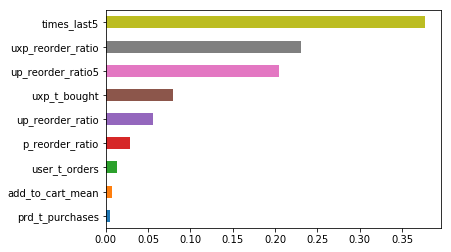

In [51]:
from sklearn.ensemble import RandomForestClassifier

X_train, y_train = data_train.drop('reordered', axis=1), data_train.reordered
rfc = RandomForestClassifier(n_estimators=200, max_depth=6, n_jobs=-1, random_state=50)
model = rfc.fit(X_train, y_train)

feature_importances_df = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances_df)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values()
feat_importances.plot(kind='barh')

del[X_train, y_train]
gc.collect()

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

X_train, y_train = data_train.drop('reordered', axis=1), data_train.reordered
lr = LogisticRegression(random_state=42, solver='lbfgs')
bagging_lr = BaggingClassifier(base_estimator=lr, n_estimators=20)
model = bagging_lr.fit(X_train, y_train) 

del[X_train, y_train]
gc.collect

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


<function gc.collect>

In [53]:
########################
#IMPORT REQUIRED PACKAGES
#######################
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import VotingClassifier
#from sklearn.model_selection import GridSearchCV
import xgboost as xgb #validate algorithm
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  #validate algorithm

#####################
#CREATE X_train, y_train
#####################
X_train, y_train = data_train.drop('reordered', axis=1), data_train.reordered
#X_train, X_val, y_train, y_val = train_test_split(data_train.drop('reordered', axis=1), data_train.reordered, test_size=0.8, random_state=42)
  #validate algorithm

#####################
# INITIATE AND TRAIN MODEL
#####################
#lr = LogisticRegression(random_state=42, solver='lbfgs')
rc = RidgeClassifier()
parameters = {'eval_metric':'logloss', 'max_depth':'5', 'colsample_bytree':'0.4', 'subsample':'0.75'}
xgbc = xgb.XGBClassifier(objective='binary:logistic', parameters=parameters, num_boost_round=10)
classifiers1 = [('Logistic Regression', bagging_lr), ('Random Forest Tree', rfc), ('XGBClassifier', xgbc)]
classifiers2 = [('Logistic Regression', bagging_lr), ('Random Forest Tree', rfc), ('XGBClassifier', xgbc), ('RidgeClassifier', rc)]
vc1 = VotingClassifier(estimators=classifiers1, voting='soft')
vc2 = VotingClassifier(estimators=classifiers2)
model1 = vc1.fit(X_train, y_train)
model2 = vc2.fit(X_train, y_train)

#####################
# SCORE MODEL
#####################
#vc1.score(X_val, y_val) # validate algorithm
#vc2.score(X_val, y_val)

#####################
## DELETE TEMPORARY OBJECTS 
#####################
del [X_train, y_train]
# del [X_val, y_val] # remove validate algorithm objects
gc.collect()

### TO REMOVE THE FUTURE WARNING THAT YOU SEE BELOW: Add the argument solver='lbfgs' to LogisticRegression( ) function

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[10:51:40] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[12:26:41] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


3952

# 5. Apply predictive model (predict)
The model that we have created is stored in the **model** object.
At this step we predict the values for the test data and we store them in a new column in the same DataFrame.

In [54]:
# Predict values for test data with our model from chapter 5 - the results are saved as a Python array
test_pred = model2.predict(data_test).astype(int)
test_pred[0:20] #display the first 20 predictions of the numpy array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [55]:
## OR set a custom threshold (in this problem, 0.21 yields the best prediction)
test_pred = (model1.predict_proba(data_test)[:,1] >= 0.21).astype(int)
test_pred[0:20] #display the first 20 predictions of the numpy array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

In [56]:
#Save the prediction in a new column in the data_test DF
data_test['prediction'] = test_pred
data_test.head(20)

uxp_t_bought     ...      prediction
user_id product_id                   ...                
3       248                    1     ...               0
        1005                   1     ...               0
        1819                   3     ...               0
        7503                   1     ...               0
        8021                   1     ...               0
        9387                   5     ...               0
        12845                  1     ...               0
        14992                  2     ...               0
        15143                  1     ...               0
        16797                  3     ...               0
        16965                  2     ...               0
        17668                  5     ...               1
        18370                  1     ...               0
        18599                  4     ...               1
        21137                  1     ...               0
        21903                  8     ...               1
        22035                  3     ...               0
        23650                  2     ...               0
        24010                  2     ...               0
        24810                  3     ...               0

[20 rows x 10 columns]

In [57]:
#Reset the index
final = data_test.reset_index()
#Keep only the required columns to create our submission file (Chapter 6)
final = final[['product_id', 'user_id', 'prediction']]

gc.collect()
final.head()

,product_id,user_id,prediction
0,248,3,0
1,1005,3,0
2,1819,3,0
3,7503,3,0
4,8021,3,0


# 6. Creation of Submission File
To submit our prediction to Instacart competition we have to get for each user_id (test users) their last order_id. The final submission file should have the test order numbers and the products that we predict that are going to be bought.

To create this file we retrieve from orders DataFrame all the test orders with their matching user_id:

In [58]:
orders_test = orders.loc[orders.eval_set=='test',("user_id", "order_id") ]
orders_test.head()

,user_id,order_id
38,3,2774568
44,4,329954
53,6,1528013
96,11,1376945
102,12,1356845


We merge it with our predictions (from chapter 5) using a left join:
<img src="https://i.imgur.com/KJubu0v.jpg" width="400">

In [59]:
final = final.merge(orders_test, on='user_id', how='left')
final.head()

,product_id,user_id,prediction,order_id
0,248,3,0,2774568
1,1005,3,0,2774568
2,1819,3,0,2774568
3,7503,3,0,2774568
4,8021,3,0,2774568


And we move on with two final manipulations:
- remove any undesired column (in our case user_id)
- set product_id column as integer (mandatory action to proceed to the next step)

In [60]:
#remove user_id column
final = final.drop('user_id', axis=1)
#convert product_id as integer
final['product_id'] = final.product_id.astype(int)

#Remove all unnecessary objects
del orders
del orders_test
gc.collect()

final.head()

,product_id,prediction,order_id
0,248,0,2774568
1,1005,0,2774568
2,1819,0,2774568
3,7503,0,2774568
4,8021,0,2774568


In this step we initiate an empty dictionary. In this dictionary we will place as index the order_id and as values all the products that the order will have. If none product will be purchased, we have explicitly to place the string "None". All this syntax follows the requirements of the competition for the submission file.

In [61]:
d = dict()
for row in final.itertuples():
    if row.prediction== 1:
        try:
            d[row.order_id] += ' ' + str(row.product_id)
        except:
            d[row.order_id] = str(row.product_id)

for order in final.order_id:
    if order not in d:
        d[order] = 'None'
        
gc.collect()

#We now check how the dictionary were populated (open hidden output)
d

{2774568: '17668 18599 21903 39190 43961 47766',
 1528013: '21903 38293',
 1376945: '8309 13176 14947 27959 28465 33572 34658 35948 44632',
 1356845: '7076 10863 11520 13176 14992',
 2161313: '196 10441 11266 12427 14715 27839 37710',
 1416320: '5134 17948 21137 21903 24852 41950',
 1735923: '196 2192 15131 17008 31487 35123',
 1980631: '6184 9387 13575 13914 22362 41400 46061',
 139655: '13176 21903 22935 27845 32655',
 1411408: '22008',
 2940603: '10339 14947 18531 19894 30592 31615 44632',
 1192143: '24759 24852 49683',
 280888: '19213 32566 41406',
 3202221: '4793 9637 11130 13629 17630 21137 21927 24852 39911 45364 45774 46979 49215',
 3222866: '7039 7969 8501 14947 15718 18894 32441 32912 33198 34254 35921 37131',
 707453: '694 4942 18150 21137 21267 21903 24852 25826 26209 28156 32030 37766 39275 42585 44142 44830 45066 47766 48230',
 1320132: '11079',
 882556: '1870 5450 7371 8424 9076 24852 25890 28204 28289 28849 30962 42768 46906 48679',
 2431024: '5322 5450 5699 6975 13176 

Now we convert the dictionary to a DataFrame and prepare it to extact it into a .csv file

In [62]:
#Convert the dictionary into a DataFrame
sub = pd.DataFrame.from_dict(d, orient='index')

#Reset index
sub.reset_index(inplace=True)
#Set column names
sub.columns = ['order_id', 'products']

sub.head()

,order_id,products
0,2774568,17668 18599 21903 39190 43961 47766
1,1528013,21903 38293
2,1376945,8309 13176 14947 27959 28465 33572 34658 35948...
3,1356845,7076 10863 11520 13176 14992
4,2161313,196 10441 11266 12427 14715 27839 37710


**The submission file should have 75.000 predictions to be submitted in the competition**

In [63]:
#Check if sub file has 75000 predictions
sub.shape[0]

75000

The DataFrame can now be converted to .csv file. Pandas can export a DataFrame to a .csv file with the .to_csv( ) function.

In [64]:
sub.to_csv('sub.csv', index=False)

# 7. Get F1 Score

Before you are ready to submit your prediction to the competion, **ensure that**:
- **You have used all of the offered data and not the 10% that was defined as an optional step on section 1.2**

To submit your prediction and get the F1 score you have to:
1. Commit this notebook and wait for the results 
2. Go to view mode (where you see your notebook but you can't edit it)
3. Click on the data section from your left panel
4. Find the sub.csv (on outputs), below the section with the data from Instacart
5. Click on "Submit to competition" button

Regarding step 1:
>This step might take long. If it exceeds 20-30 minutes it would be wise to check your code again. Kaggle won't inform you during commit if the notebook has:
- syntax errors
- if it exceeds 16 GB RAM
- if it takes an algorirthms too much to train or predict

>Any new commit:
- can't take more than 9 hours
- doesn't stop if it exceeds the 16 GB RAM - you will just receive an error of unsuccesful commit after 9 hours